In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg

In [3]:
building=mpimg.imread("sample_images/building.jpg")
building4D=np.array([building])

In [4]:
batch_size,height,width,channels=building4D.shape

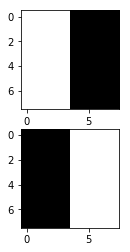

In [78]:
filters=np.zeros(shape=(8,8,channels,2),dtype=np.float32)
# row,column,chanel,depth
filters[:,0:4,:,0]=1 #vertical1
filters[:,4:8,:,1]=1 #vertical2
plt.subplot(211).imshow(filters[:,:,:,0])
plt.subplot(212).imshow(filters[:,:,:,1])

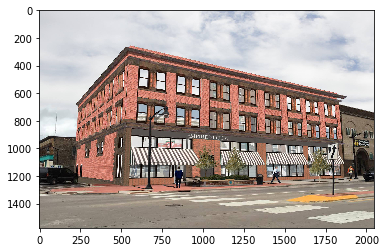

In [79]:
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution=tf.nn.conv2d(X,filters,strides=[1,1,1,1],padding="SAME")
with tf.Session()as sess:
    output=sess.run(convolution,feed_dict={X:building4D})
plt.subplot(111).imshow(building,cmap="gray",aspect='auto')

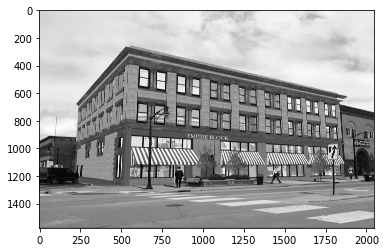

In [80]:
plt.subplot(111).imshow(output[0,:,:,0],cmap="gray",aspect='auto')

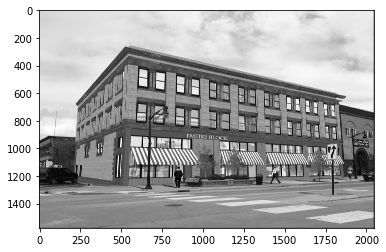

In [81]:
plt.subplot(111).imshow(output[0,:,:,1],cmap="gray",aspect='auto')

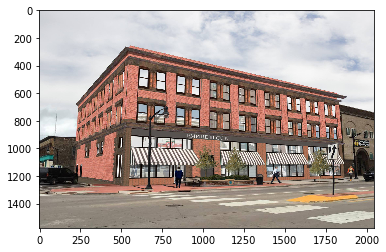

In [82]:
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,height,width,channels))
avg_pool=tf.nn.avg_pool(X,ksize=[1,2,2,1],strides=[1,1,1,1],padding="VALID")
with tf.Session()as sess:
    output=sess.run(avg_pool,feed_dict={X:building4D})
plt.subplot(111).imshow(output[0].astype(np.uint8),aspect='auto')